In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import scipy.interpolate as interp

import sys

sys.path.append("../lib/")
import matplotlib.pyplot as plt
from figparams import *

plt.rcParams.update(rc_params)
from utils import *


In [2]:
label = [
    "alpha",
    "amp",
    "fknee",
    "fr1",
    "fr2",
    "lat",
    "long",
    "psi",
    "s1",
    "s2",
    "A",
    "P",
]
colors_tot = get_colormap_colors(24, "plasma")
colors = colors_tot[:12][::-1]


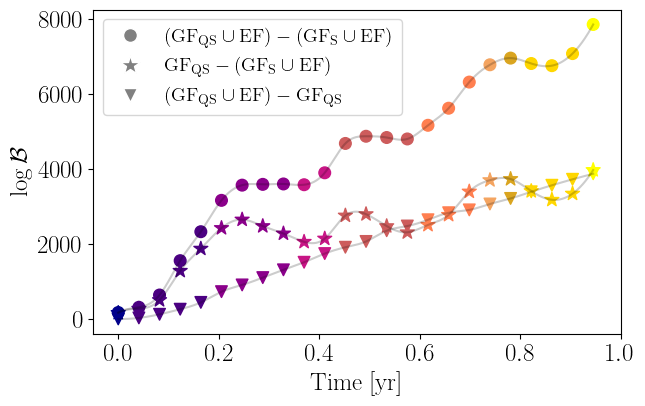

In [11]:
def read_log_evidence(mode, like, npack):
    log_evidence = np.zeros((npack,))
    for i in range(npack):
        with h5py.File(
            f"../data/first_year_egf/pack_{i + 1}/nessai/{like}/{mode}/result.hdf5", "r"
        ) as f:
            log_evidence[i] = f["log_evidence"][()]

    return log_evidence


# example usage
npack = 24


log_evidence_gc = read_log_evidence("cyclo", "Gamma", npack)
log_evidence_gs = read_log_evidence("stat", "Gamma", npack)
log_evidence_eg = read_log_evidence("noegf", "Gamma", npack)

bf_g1 = log_evidence_gc - log_evidence_gs
bf_g2 = log_evidence_gc - log_evidence_eg
bf_g3 = log_evidence_eg - log_evidence_gs

chunk = 15 * 86400
time = np.arange(0, 15 * 86400 * 24, chunk)
year = 31536000

plt.figure(figsize=rect_size)
# interpolate with spline for smooth curve
xnew = np.linspace(0, 15 * 86400 * 23 / year, 1000)
spl_g1 = interp.UnivariateSpline(time / year, bf_g1, s=0)
spl_g2 = interp.UnivariateSpline(time / year, bf_g2, s=0)
spl_g3 = interp.UnivariateSpline(time / year, bf_g3, s=0)
plt.plot(xnew, spl_g1(xnew), color="k", alpha=0.2)
plt.plot(xnew, spl_g2(xnew), color="k", alpha=0.2)
plt.plot(xnew, spl_g3(xnew), color="k", alpha=0.2)

plt.scatter(time / year, bf_g1, c=colors_tot, marker="o", s=70)
plt.scatter(time / year, bf_g2, c=colors_tot, marker="v", s=70)
plt.scatter(time / year, bf_g3, c=colors_tot, marker="*", s=110)


plt.xlim(-0.05, 1)
plt.xlabel("Time [yr]")
plt.ylabel(r"$\log\mathcal{B}$")
# avoid printing legend box


legend = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label=r"$(\mathrm{GF_{QS}} \cup \mathrm{EF}) - (\mathrm{GF_{S}} \cup \mathrm{EF})$",
        markerfacecolor="gray",
        markersize=10,
    ),
    plt.Line2D(
        [0],
        [0],
        marker="*",
        color="w",
        label=r"$\mathrm{GF_{QS}} - (\mathrm{GF_{S}} \cup \mathrm{EF})$",
        markerfacecolor="gray",
        markersize=15,
    ),
    plt.Line2D(
        [0],
        [0],
        marker="v",
        color="w",
        label=r"$(\mathrm{GF_{QS}} \cup \mathrm{EF}) - \mathrm{GF_{QS}}$",
        markerfacecolor="gray",
        markersize=10,
    ),
]
plt.legend(handles=legend, loc="upper left", fontsize=14)
# plt.title('Extra Foreground')
plt.savefig("../plots/Figure9.pdf", dpi=300, bbox_inches="tight")